In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pprint import pprint

In [2]:
with open(os.getcwd() + "/ram_accesss_time_data.out") as f:
    lines = f.readlines()

lines = [line.strip() for line in lines if line.strip() != '']

# print(len(lines))
# pprint(lines[21:25])
# pprint(lines[24][21:30])

In [3]:
# Parse data file into a map: STRIDE_SZ : [VAL1, VAL2, ...]

data = {}

for stride_batch in range(20):
    strt_line = stride_batch * 21
    end_line = strt_line + 20
    assert lines[strt_line].startswith('STRIDE_SIZE')
    
    stride_sz = int(lines[strt_line][12:-1])
    data[stride_sz] = []
    
    for line in lines[strt_line + 1: end_line + 1]:
        strt_idx = line.index('AVG(') + 4
        end_idx = line.index('), STD')
        val = line[strt_idx: end_idx]
        data[stride_sz].append(float(val))
    

for key in data.keys():
    assert len(data[key]) == 20
    
# pprint(data)

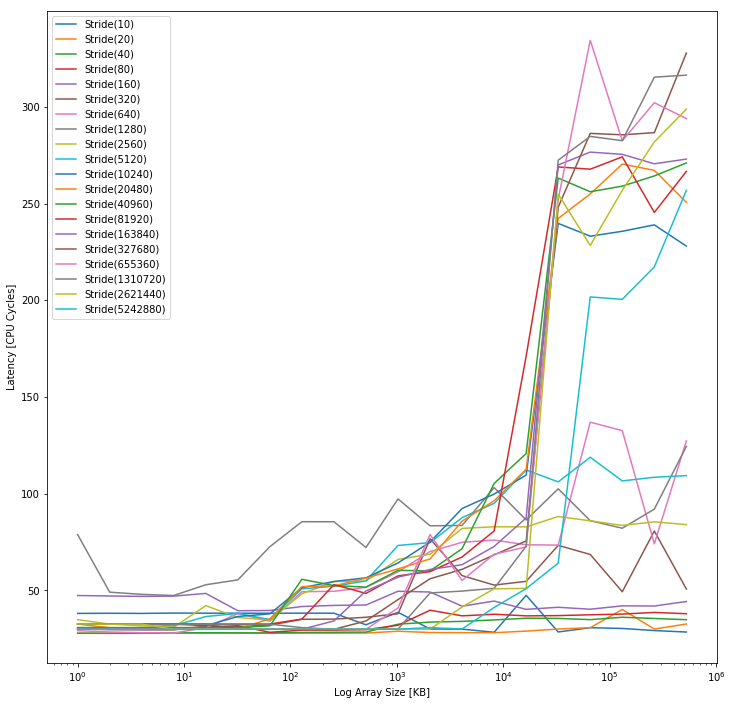

In [12]:
# Plot data
plt.figure(figsize=(12,12))
arr_sizes = [2**i for i in range(20)]
legend = []
for stride_sz in data.keys():
    plt.plot(arr_sizes, data[stride_sz])
    legend.append('Stride(' + str(stride_sz) + ')')
plt.xscale('log')
plt.xlabel('Log Array Size [KB]')
plt.ylabel('Latency [CPU Cycles]')
plt.legend(legend, loc='upper left')
plt.savefig('Memory Latencies')
plt.show()
